In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv("data.csv") #load the dataset   
df = df[0:-38]  #so leaving the last 38 entries 
df.tail()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
451,DELHI,OTHER CRIMES AGAINST CHILDREN,67,47,71,111,141,457,328,331,208,300,274,330
452,LAKSHADWEEP,OTHER CRIMES AGAINST CHILDREN,0,0,0,0,0,0,0,0,0,0,0,0
453,PUDUCHERRY,OTHER CRIMES AGAINST CHILDREN,0,6,2,2,2,3,5,8,4,0,2,3
454,TOTAL (UTs),OTHER CRIMES AGAINST CHILDREN,78,63,76,129,156,462,338,386,259,337,296,358
455,TOTAL (ALL-INDIA),OTHER CRIMES AGAINST CHILDREN,5028,4648,4677,6000,6150,7559,7662,8476,8972,8575,8927,9918


In [91]:
df['TOTAL'] = df.iloc[:,-12:].sum(axis=1)  #added new col ='total' for 11years each row
df.head()

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,TOTAL
0,ANDHRA PRADESH,INFANTICIDE,1,1,3,0,0,0,1,0,5,6,1,6,47
1,ARUNACHAL PRADESH,INFANTICIDE,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ASSAM,INFANTICIDE,0,5,0,0,1,0,0,0,0,0,0,0,12
3,BIHAR,INFANTICIDE,0,0,0,0,2,0,2,2,0,2,5,2,30
4,CHHATTISGARH,INFANTICIDE,7,29,5,12,0,15,11,6,2,0,10,5,197


In [92]:
list_of_all_states_and_uts = df['STATE/UT'].unique().tolist()  
list_of_all_states_and_uts #type List

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'TOTAL (STATES)',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI',
 'LAKSHADWEEP',
 'PUDUCHERRY',
 'TOTAL (UTs)',
 'TOTAL (ALL-INDIA)']

In [93]:
''' #also contains
'TOTAL (STATES)',
'TOTAL (UTs)',
'TOTAL (ALL-INDIA)'
'''
#now we will remove those
list_of_all_states_and_uts.remove('TOTAL (STATES)') 
list_of_all_states_and_uts.remove('TOTAL (UTs)') 
list_of_all_states_and_uts.remove('TOTAL (ALL-INDIA)') 
list_of_all_states_and_uts #type List

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL',
 'A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [94]:
len(list_of_all_states_and_uts)   #no. of all states & UTs

35

In [95]:
''' |This is all UTs|
 A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI',
 'LAKSHADWEEP',
 'PUDUCHERRY',
'''
list_of_all_uts = list_of_all_states_and_uts[28:36]
list_of_all_uts   #type List

['A & N ISLANDS',
 'CHANDIGARH',
 'D & N HAVELI',
 'DAMAN & DIU',
 'DELHI',
 'LAKSHADWEEP',
 'PUDUCHERRY']

In [96]:
len(list_of_all_uts)  #so total 7 union territories

7

In [97]:
list_of_all_states = list_of_all_states_and_uts[0:28]   #This is all States
list_of_all_states   #type List

['ANDHRA PRADESH',
 'ARUNACHAL PRADESH',
 'ASSAM',
 'BIHAR',
 'CHHATTISGARH',
 'GOA',
 'GUJARAT',
 'HARYANA',
 'HIMACHAL PRADESH',
 'JAMMU & KASHMIR',
 'JHARKHAND',
 'KARNATAKA',
 'KERALA',
 'MADHYA PRADESH',
 'MAHARASHTRA',
 'MANIPUR',
 'MEGHALAYA',
 'MIZORAM',
 'NAGALAND',
 'ODISHA',
 'PUNJAB',
 'RAJASTHAN',
 'SIKKIM',
 'TAMIL NADU',
 'TRIPURA',
 'UTTAR PRADESH',
 'UTTARAKHAND',
 'WEST BENGAL']

In [98]:
len(list_of_all_states)  #so total 28 states

28

In [135]:
#indian crime chart calulcations

icc_total_list = []  #total_of_list_of_all_states_for_all_crime_and_years

for i in list_of_all_states_and_uts:
    #the Series.str.contains() function has returned a series object of boolean values. 
    #It is true if the passed pattern is present in the string else False is returned.
    temp1 = df[df['STATE/UT'].str.contains(i)]  #getting each state/UT crime for 2001 to 2012
    print(temp1) 
    print('------------------------------------------------------------------------------------- temp1: ',i)
    temp2=temp1.sum(axis=0)  #getting each state/UT sum of all the years & total of all years
    print(temp2) 
    print('------------------------------------------------------------------------------------- temp2: ',i)
    temp2=temp2['TOTAL'] #get the total of all years for each state/UT
    print(temp2)
    print('------------------------------------------------------------------------------------- temp2: ',i)
    icc_total_list.append(temp2) #adding total of all years for each state/UT to a list
    print(icc_total_list)
    print('------------------------------------------------------------------------------------- total_list: ',i)

           STATE/UT                            CRIME HEAD  2001  2002  2003  \
0    ANDHRA PRADESH                           INFANTICIDE     1     1     3   
38   ANDHRA PRADESH                    MURDER OF CHILDREN    42    50    96   
76   ANDHRA PRADESH                      RAPE OF CHILDREN   102   136   326   
114  ANDHRA PRADESH  KIDNAPPING and ABDUCTION OF CHILDREN    69   127   360   
152  ANDHRA PRADESH                             FOETICIDE     0     0     0   
190  ANDHRA PRADESH                   ABETMENT OF SUICIDE     7    15     0   
228  ANDHRA PRADESH              EXPOSURE AND ABANDONMENT     0     0     2   
266  ANDHRA PRADESH            PROCURATION OF MINOR GILRS    22    15    30   
304  ANDHRA PRADESH      BUYING OF GIRLS FOR PROSTITUTION     0     1     0   
342  ANDHRA PRADESH     SELLING OF GIRLS FOR PROSTITUTION     0     0     1   
380  ANDHRA PRADESH     PROHIBITION OF CHILD MARRIAGE ACT     3    15     6   
418  ANDHRA PRADESH         OTHER CRIMES AGAINST CHI

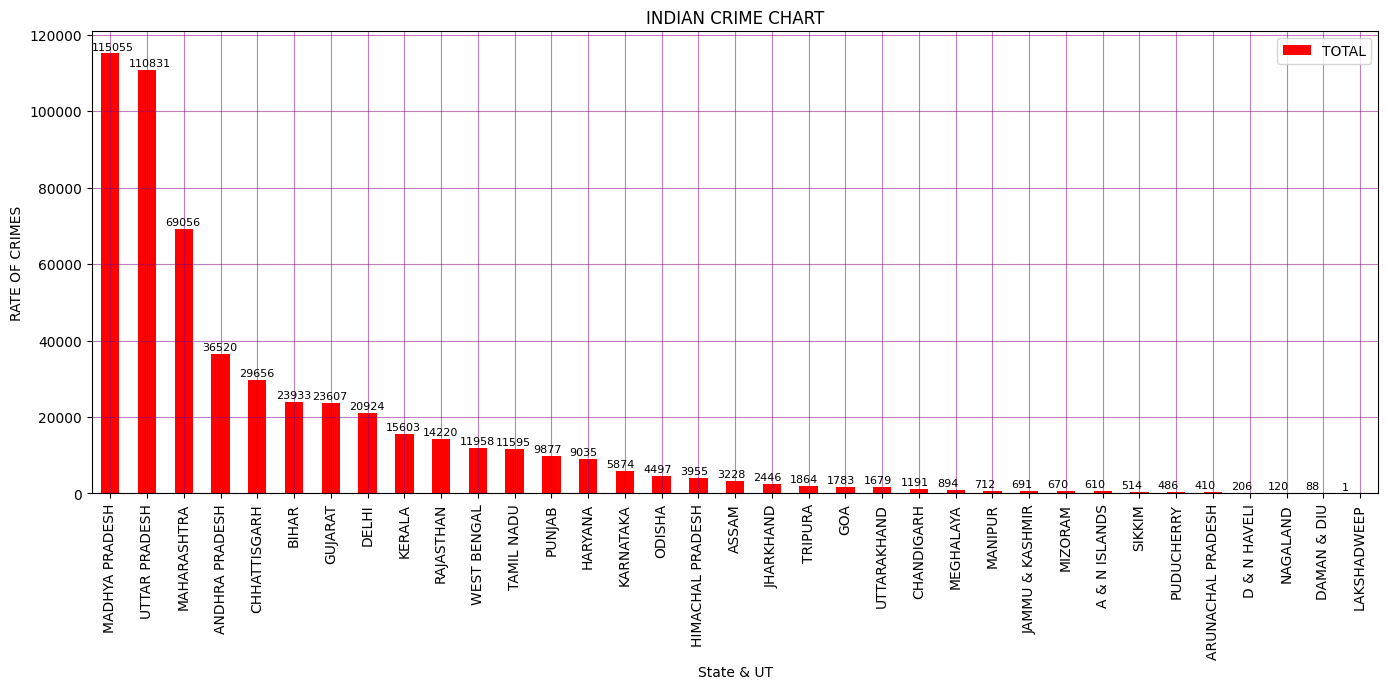

In [131]:
#indian crime chart

india_crime_chart = {'STATE/UT': list_of_all_states_and_uts, 'TOTAL':icc_total_list}  #adding two columns: State/UT with their names & total with their total
df_india_crime_chart = pd.DataFrame(india_crime_chart)  #converting the list to dataframe
df_india_crime_chart = df_india_crime_chart.sort_values(by = 'TOTAL', ascending=False)  #sorting in decending order 

#The below graph shows total crime on childern happening in all states in decending order
df_india_crime_chart.plot(kind='bar',x='STATE/UT',y='TOTAL',color='red',figsize=(16.6,6))
plt.title('INDIAN CRIME CHART')
plt.grid(visible=True, color='purple',alpha=0.5)
plt.xlabel('State & UT')
plt.ylabel("RATE OF CRIMES")

 
list_india_crime_chart = df_india_crime_chart['TOTAL'].tolist()  
for i in range(35):
        plt.text(x=i-0.5, y = list_india_crime_chart[i]+1000, s = list_india_crime_chart[i], size = 8)       
        
plt.show()

In [132]:
#total crime calculations

df_total_crime = df[df['STATE/UT']=='TOTAL (ALL-INDIA)']
df_total_crime

,STATE/UT,CRIME HEAD,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,TOTAL
37,TOTAL (ALL-INDIA),INFANTICIDE,117,124,84,63,80,87,147,118,40,82,67,68,2037
75,TOTAL (ALL-INDIA),MURDER OF CHILDREN,1482,1305,1531,1685,1506,1725,1849,1822,1943,1981,2095,2353,41072
113,TOTAL (ALL-INDIA),RAPE OF CHILDREN,2695,2806,3423,4233,4636,5489,5756,6363,6308,6398,8499,10171,130859
151,TOTAL (ALL-INDIA),KIDNAPPING and ABDUCTION OF CHILDREN,3335,2575,3035,3863,4049,4888,6104,8066,8112,9085,13994,17863,166603
189,TOTAL (ALL-INDIA),FOETICIDE,50,39,39,47,55,77,41,44,62,51,70,83,1266
227,TOTAL (ALL-INDIA),ABETMENT OF SUICIDE,20,33,24,52,58,52,34,28,57,65,113,277,1606
265,TOTAL (ALL-INDIA),EXPOSURE AND ABANDONMENT,167,153,161,138,158,192,196,163,141,97,135,158,3551
303,TOTAL (ALL-INDIA),PROCURATION OF MINOR GILRS,198,204,174,187,154,298,287,292,337,684,982,676,8748
341,TOTAL (ALL-INDIA),BUYING OF GIRLS FOR PROSTITUTION,12,27,31,35,43,67,66,47,45,97,60,25,1098
379,TOTAL (ALL-INDIA),SELLING OF GIRLS FOR PROSTITUTION,16,118,121,25,53,131,69,60,31,166,156,128,2132


In [133]:
df_total_crime['CRIME HEAD'].count()   #no. of crime on childern india

12

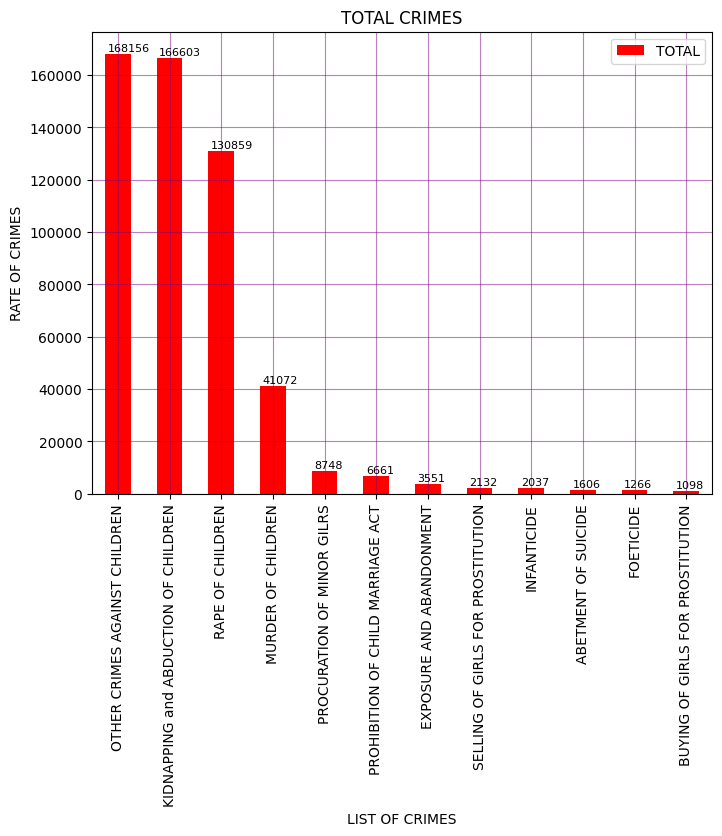

In [124]:
#total crime

df_total_crime = df_total_crime.sort_values(by ='TOTAL' ,ascending=False)
df_total_crime.plot(kind='bar', x='CRIME HEAD', y='TOTAL', color='red', figsize=(8,6))
plt.title('TOTAL CRIMES')
plt.grid(visible=True, color='purple',alpha=0.5)
plt.xlabel('LIST OF CRIMES')
plt.ylabel("RATE OF CRIMES")
    
list_total_crime = df_total_crime['TOTAL'].tolist()
for i in range(12):
        plt.text(x=i-0.2, y = list_total_crime[i]+1000, s = list_total_crime[i], size = 8)
 
plt.show()

In [139]:
#all_States  (Similar to indian crime chart  just excluding)


addStates_total_list = []
for i in list_of_all_states:
    temp3 =  df[df['STATE/UT'].str.contains(i)]
    print(temp3)
    print('------------------------------------------------------------------------------------- temp3: ',i)
    #temp4 = temp3.sum(axis=0)
    


#all_UT

           STATE/UT                            CRIME HEAD  2001  2002  2003  \
0    ANDHRA PRADESH                           INFANTICIDE     1     1     3   
38   ANDHRA PRADESH                    MURDER OF CHILDREN    42    50    96   
76   ANDHRA PRADESH                      RAPE OF CHILDREN   102   136   326   
114  ANDHRA PRADESH  KIDNAPPING and ABDUCTION OF CHILDREN    69   127   360   
152  ANDHRA PRADESH                             FOETICIDE     0     0     0   
190  ANDHRA PRADESH                   ABETMENT OF SUICIDE     7    15     0   
228  ANDHRA PRADESH              EXPOSURE AND ABANDONMENT     0     0     2   
266  ANDHRA PRADESH            PROCURATION OF MINOR GILRS    22    15    30   
304  ANDHRA PRADESH      BUYING OF GIRLS FOR PROSTITUTION     0     1     0   
342  ANDHRA PRADESH     SELLING OF GIRLS FOR PROSTITUTION     0     0     1   
380  ANDHRA PRADESH     PROHIBITION OF CHILD MARRIAGE ACT     3    15     6   
418  ANDHRA PRADESH         OTHER CRIMES AGAINST CHI